<a href="https://colab.research.google.com/github/Likhita-T/FutureMakers/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

In [2]:
# size of encoded representations
encoding_dim = 32 

In [3]:
# input image
input_img = keras.Input(shape=(784,))

In [4]:
# encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [5]:
# lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [6]:
# maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [7]:
# maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [8]:
# encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

In [9]:
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [10]:
# decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 16s 11ms/step - loss: 0.3882 - val_loss: 0.1920
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1807 - val_loss: 0.1533
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1494 - val_loss: 0.1344
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1329 - val_loss: 0.1233
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1225 - val_loss: 0.1152
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1150 - val_loss: 0.1096
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1101 - val_loss: 0.1056
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1059 - val_loss: 0.1022
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1029 - val_loss: 0.0996
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1003 - val_loss: 0

In [16]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [18]:
import matplotlib.pyplot as plt

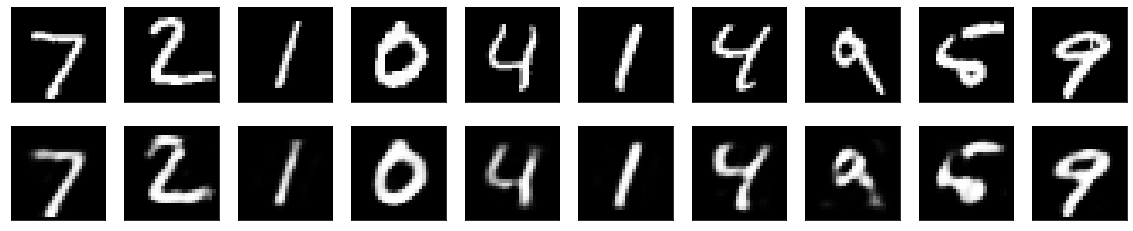

In [19]:
n = 10   
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
# Adding a sparsity constraint 
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [21]:
# Deep autoencoder

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 15ms/step - loss: 0.3370 - val_loss: 0.1666
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1577 - val_loss: 0.1360
Epoch 3/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1335 - val_loss: 0.1234
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1227 - val_loss: 0.1151
Epoch 5/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1155 - val_loss: 0.1104
Epoch 6/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1108 - val_loss: 0.1069
Epoch 7/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1072 - val_loss: 0.1039
Epoch 8/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1046 - val_loss: 0.1022
Epoch 9/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1027 - val_loss: 0.1005
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.101

In [17]:
# Convolutional autoencoder
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
tensorboard --logdir=/tmp/autoencoder


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])